# Assignment 2 - Question 1

Pick any file (or files) in NLTK package
Prove if Zipf’s Law works in Natural Language or not

REQUIREMNTS:
Use ’glob’ to open and read file
If read multiple files use LOOP to achieve
Create at least one function and one lambda function
Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK
Open your CSV file, generate a log-log figure according to the data you saved
Write a conclusion at the end of your code base on your figure

In [1]:
#Importing all the required packages
import nltk
from nltk.corpus import gutenberg
import glob

#Printing all the files from Gutenberg corpus
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [7]:
#Assigning the file 'austen-emma.txt' to the variable 'path'
path = nltk.data.find('corpora/gutenberg/austen-emma.txt')

#Assigning the variable 'd' with the path to the particular corpus file using glob.glob
d = glob.glob(path)
for w in d:
    with open(w) as textfile:  #opening the file
        text = textfile.read() #reading the file into the variable 'text'

In [8]:
#Importing the package re (regular expression)
import re

#Finding all the alphabets and numbers out of the text file
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)',text)

#Taking out the total number of words and assigning to the variable 'Number'
Number = len(words)

#Printing the total number of words
print(Number)

120701


In [9]:
dictionary = dict()
for c in words:
    if c not in dictionary:
        dictionary[c]=1
    else:
        dictionary[c] += 1
w_sorted = sorted(dictionary.items(), key = lambda x : x[1] ,reverse = True)

In [10]:
#Importing the csv package
import csv

#Opening the file 'austen-emma.txt' with mode as 'write' 
with open(('austen-emma.csv'), 'w', newline="") as F_csv:
    output = csv.writer(F_csv) #converts F_csv suitable for writing and assigning it into output
    output.writerow(['Words', 'Frequency', 'Rank']) #Iterating the data over the rows 
    rank = 1
    for row in w_sorted: #Running a for loop for each row in the sorted data, iterate and write through the rows
        output.writerow([row[0], row[1], rank])
        rank += 1
        F_csv.close

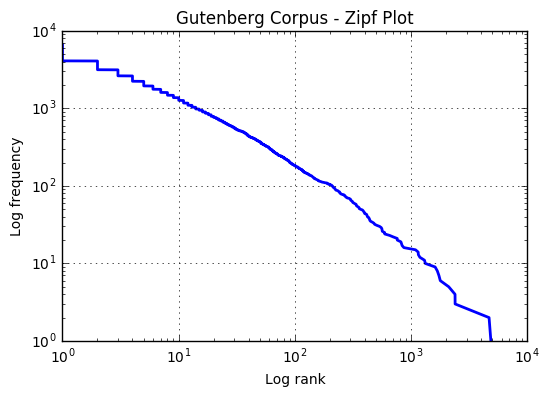

In [11]:
#Importing the matplotlib.pyplot package
import matplotlib.pyplot as plt

#opening and reading the austen-emma.txt file and assigning it to csvfile 
csvfile = open('austen-emma.csv', 'r')

#opening three empty lists 
words = []
frequency = []
rank = []

#Taking out the data from the csvfile and reading it into file_csv variable
file_csv = csv.reader(csvfile)

#Running a for loop for each row in the file_csv and appending the data
for row in file_csv:
    words.append(row[0])
    frequency.append(row[1])
    rank.append(row[2])
rank.pop(0) #removes the 0th line from rank
frequency.pop(0) #removes the 0th line from frequency
plt.loglog(frequency,rank,color='b',linewidth=2) #Creating a logarithmic plot giving the x and y axis
plt.grid(True) #Giving true for grid in the plot
plt.title("Gutenberg Corpus - Zipf Plot") #Giving the title of the plot
plt.xlabel("Log rank") #Giving the x axis label
plt.ylabel("Log frequency") #Giving the y axis label
plt.show() #Showing the plot

# The graph is plotted by giving log(r)  in x axis and log(freq(r)) in y axis. The plot gives us a line with slope as -1 which proves that the Zipf's law holds true for the austen-emma.txt file from gutenberg corpus.